# Convert  ".root" data into ".pkl"

In [1]:
%pylab inline

import uproot
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


### Carico il Monte Carlo e i dati

In [2]:
df_MC = uproot.open('/home/fmazzasc/HypertritonData/HyperTree_MC_Signal.root')['HyperTree_MC_Signal'].pandas.df()

In [3]:
df_data = uproot.open('/home/fmazzasc/HypertritonData/HyperTree_Data.root')['HyperTree_Data'].pandas.df()

In [5]:
len(df_data)

4502353

In [5]:
df_MC

,V0pt,TPCnSigmaHe3,DistOverP,InvMass,ArmenterosAlpha,V0CosPA,V0Chi2,PiProngPt,He3ProngPt,ProngsDCA,He3ProngPvDCA,PiProngPvDCA,NpidClustersHe3,TPCnSigmaPi,Lrec,Centrality
entry,,,,,,,,,,,,,,,,
0,1.801913,0.500,3.079487,2.992206,0.848579,0.997848,0.00,0.194784,1.619431,0.77,1.000000,1.000000,120.0,0.125,6.497778,4.65
1,2.850354,0.625,5.009816,2.992606,-0.865971,0.999918,0.00,0.193109,2.667301,0.58,0.667969,1.000000,124.0,1.125,14.319689,4.65
2,3.941775,-0.500,2.213483,2.993389,0.799560,0.999990,0.00,0.408496,3.537629,0.00,0.156250,1.000000,127.0,-1.000,9.055533,1.35
3,5.601911,0.250,3.571688,2.992445,-0.892057,0.999999,0.00,0.276571,5.337098,0.40,0.519531,1.000000,145.0,-0.375,22.357100,7.55
4,2.040387,0.625,6.642829,2.986990,-0.794670,0.999532,0.00,0.215732,1.830621,0.68,0.910156,1.000000,87.0,-0.375,13.555475,7.15
5,2.269736,0.500,2.579412,2.987460,-0.806079,0.999986,0.00,0.245714,2.032371,0.01,0.257812,1.000000,124.0,0.125,6.225307,0.85
6,2.825236,0.875,2.952540,2.971048,0.868278,0.999371,0.00,0.212384,2.619811,0.76,0.613281,1.000000,59.0,0.875,8.946359,3.35
7,1.948482,-0.375,5.054730,2.991581,0.776829,0.999574,0.00,0.241665,1.714511,0.59,0.191406,1.000000,134.0,-2.875,11.043752,0.65
8,3.312835,-0.750,3.705652,2.990720,-0.839594,0.999985,0.00,0.300491,3.028956,0.25,0.406250,1.000000,145.0,0.500,14.278452,4.25


## Provo a vedere cosa succede usando i tagli standard

In [6]:
df_data=df_data.astype('float')

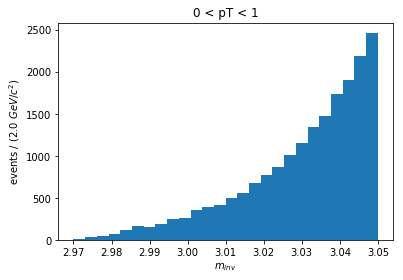

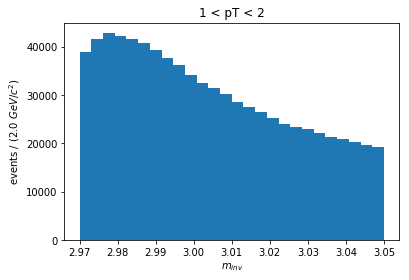

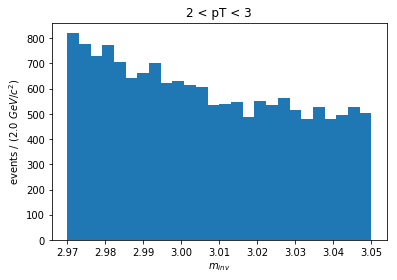

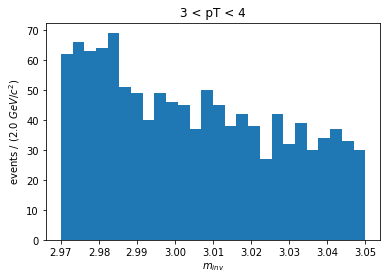

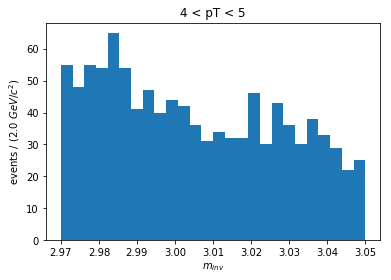

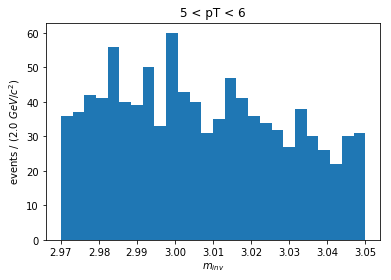

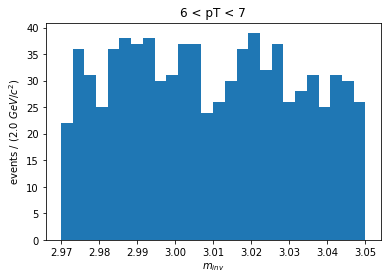

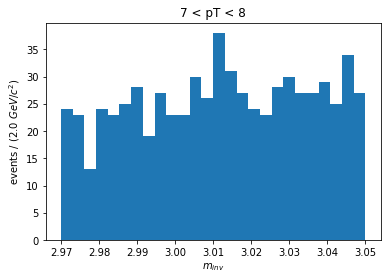

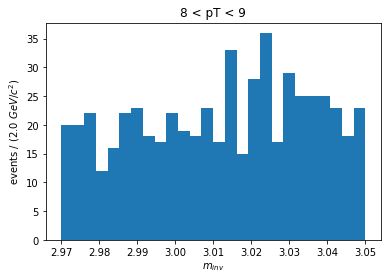

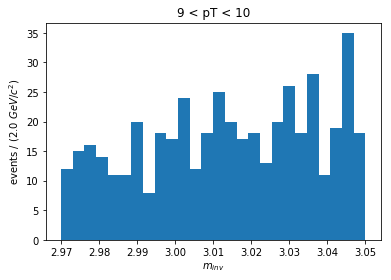

In [7]:
for i in range(10):
    plt.figure();
    hyper_df=df_data.query('V0pt>=@i and V0pt<@i+1 and Centrality>10.0 and Centrality<=40.0 ')
    n,bins,_=plt.hist(hyper_df['InvMass'],bins=26,range=[2.97,3.05],histtype='barstacked')
    title('{} < pT < {}'.format(i,i+1))
    xlabel('$m_{inv}$')
    ylabel('events / $(2.0\ GeV/\it{c}^2)$')

# Creo e salvo pandas per ML

In [18]:
len(df_Bkg)

1400643

In [8]:
df_Bkg = df_data.query('(InvMass<2.98 or InvMass>3.005) and V0pt<=10')
df_Bkg=df_Bkg[0:10*len(df_MC)]
df_Bkg['y']=0
df_MC['y']=1

In [9]:
df_ML= pd.concat([df_MC,df_Bkg])
df_ML.to_pickle('/home/fmazzasc/HypertritonData/df_ML.pkl')

In [6]:
df_Sig_data=df_data.query('2.960<InvMass<3.050 and V0pt<=10')

In [7]:
df_Sig_data.to_pickle('/home/fmazzasc/HypertritonData/df_Sig_data.pkl')

### Uso tagli V0finder


In [ ]:
len(df_MC.query('He3ProngPvDCA>0.05 and PiProngPvDCA>0.05 and V0CosPA>0.95 and ProngsDCA<1.40 and 0.9<Lrec<200  '))

In [ ]:
plt.hist(df_data['Centrality'])

In [14]:
a=np.ndarray((1,8),dtype=object)